# 결정트리

In [1]:
import pandas as pd
wine = pd.read_csv('day5_data4.csv')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
X = wine[['alcohol', 'sugar', 'pH']].to_numpy()
Y = wine['class'].to_numpy()

In [6]:
from sklearn.preprocessing import StandardScaler

x_data = StandardScaler().fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

t_x, tt_x, t_y, tt_y = train_test_split(x_data, Y, random_state= 42)

In [9]:
t_x.shape, t_y.shape

((4872, 3), (4872,))

In [10]:
from sklearn.linear_model import LogisticRegression

lo_g = LogisticRegression()
lo_g.fit(t_x, t_y)

LogisticRegression()

In [11]:
lo_g.score(t_x, t_y), lo_g.score(tt_x, tt_y)

(0.7859195402298851, 0.7655384615384615)

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state= 42)
dt.fit(t_x, t_y)

DecisionTreeClassifier(random_state=42)

In [14]:
dt.score(t_x, t_y), dt.score(tt_x, tt_y)  # 과대적합

(0.9973316912972086, 0.8498461538461538)

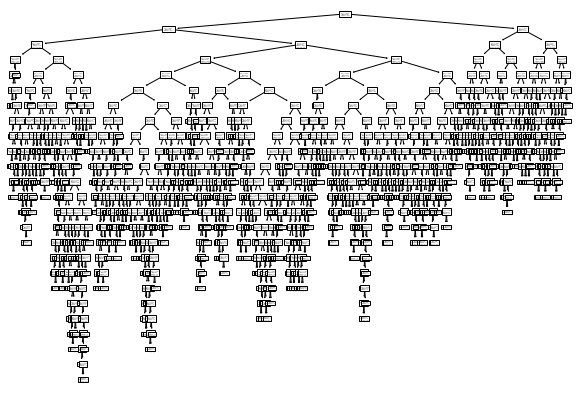

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize= (10, 7))
plot_tree(dt)
plt.show()

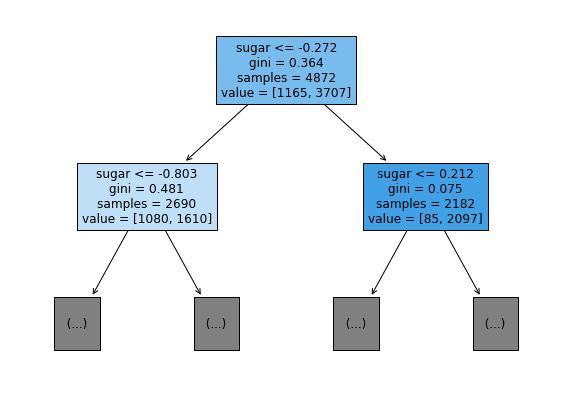

In [18]:
plt.figure(figsize= (10, 7))
plot_tree(dt, max_depth= 1, filled= True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

In [33]:
dt1 = DecisionTreeClassifier(max_depth= 5, random_state= 42)
dt1.fit(t_x, t_y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
dt1.score(t_x, t_y), dt1.score(tt_x, tt_y)

(0.8725369458128078, 0.8584615384615385)

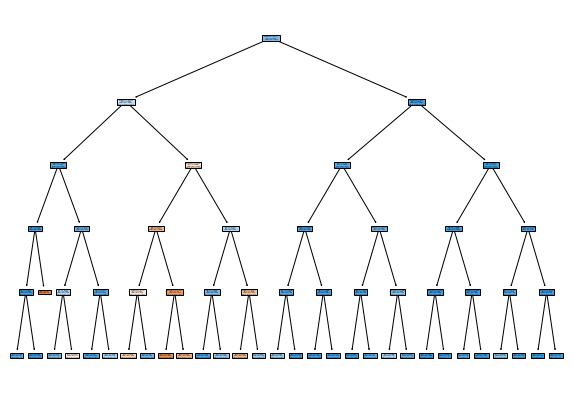

In [35]:
plt.figure(figsize= (10, 7))
plot_tree(dt1, filled= True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

In [36]:
dt1.feature_importances_

array([0.13860406, 0.72615713, 0.1352388 ])